<a href="https://colab.research.google.com/github/Nicolas-Taylor/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Nicolas_Taylor_LS_DS14_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [77]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 03:38:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.3’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.07s   

2020-03-18 03:38:26 (270 KB/s) - ‘house-votes-84.data.3’ saved [18171/18171]



In [94]:
#imports needed libraries
#Reads inour data and adds column names

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [95]:
#Changes some column values

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
#Creates new dataframe for just republicans and dropns NaN values

rep=df[df['party']=='republican'].dropna()

In [0]:
#creates new dataframe for just democrats and drops NaN values

dem=df[df['party']=='democrat'].dropna()

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  #turns data into an array and finds mean
  data=np.array(data)
  mean=np.mean(data)
  n=len(data)
  s=data.std(ddof=1)
  stderr=s/np.sqrt(n)
  t=stats.t.ppf((1 + confidence) / 2.0, n-1)
  margin_of_error=t*stderr
  return(mean, mean-margin_of_error, mean + margin_of_error)

In [99]:
#Finds mean and mean +/- moe for republican votes for handicapped-infants

CI=confidence_interval(rep['handicapped-infants'])
CI

(0.21296296296296297, 0.13450349074958223, 0.2914224351763437)

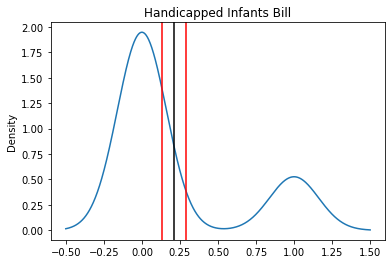

In [100]:
#Plots handicapped-infant votes and adds the mean and mean +/- moe 

rep['handicapped-infants'].plot.density()

plt.title("Handicapped Infants Bill")
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[2], color='red')

plt.show()

#The confidence interval goes 36% above and below our mean

In [101]:
#reads in our new dataframe

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [103]:
#Looks at the hours-per-week people worked

df['hours-per-week'].value_counts().sort_index()

1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Name: hours-per-week, Length: 94, dtype: int64

In [104]:
#Looks at the highest form of education the people have

df['education'].value_counts().sort_index()

 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: education, dtype: int64

In [105]:
#Creates a crosstab for education and hours per week to see if they're related
#And displays the total hours per week 

observed_freq=pd.crosstab(df['education'], df['hours-per-week'], margins=True)
observed_freq

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,All
education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10th,3,1,1,3,2,5,0,7,0,19,2,17,0,2,24,5,1,4,0,49,1,1,2,11,24,1,2,4,1,51,1,8,1,2,45,9,3,12,2,441,...,5,0,1,0,24,0,0,0,0,6,0,0,1,12,0,0,0,1,0,0,0,5,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,5,933
11th,0,1,3,3,8,2,5,20,2,19,0,29,2,1,55,26,4,8,3,118,1,4,3,10,45,1,2,3,0,59,1,11,0,1,43,9,5,6,2,482,...,2,0,2,1,30,0,0,0,0,11,0,0,0,7,1,0,0,2,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1175
12th,0,0,0,0,0,3,1,2,0,7,0,6,0,1,9,6,2,6,0,38,2,0,1,6,16,0,1,1,0,23,0,4,1,0,20,2,0,4,1,203,...,1,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,433
1st-4th,0,0,0,1,1,0,0,0,0,1,0,2,0,0,2,1,0,1,0,11,1,1,0,3,4,0,0,1,0,6,0,2,0,2,12,1,1,2,0,80,...,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,168
5th-6th,0,0,1,0,0,1,0,1,0,4,0,2,0,0,6,1,0,0,1,11,1,1,0,2,7,0,0,0,0,10,0,4,1,1,14,4,2,2,0,202,...,3,0,0,1,4,0,0,0,0,1,0,1,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,333
7th-8th,0,3,2,3,2,0,1,3,0,18,0,1,0,1,6,3,0,0,2,23,1,0,1,6,16,1,0,0,0,33,1,9,2,0,32,5,0,10,0,315,...,3,0,0,0,19,0,0,1,1,2,1,0,0,4,1,0,0,6,0,0,0,3,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,7,646
9th,1,1,0,0,3,2,0,0,2,2,1,3,2,0,8,6,0,0,0,22,0,2,2,6,16,1,0,1,0,16,0,4,1,1,25,3,6,4,1,271,...,2,0,1,0,4,0,0,0,0,2,0,0,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,514
Assoc-acdm,1,4,3,3,4,3,1,4,1,4,0,2,3,0,10,5,0,2,0,38,1,1,0,5,27,1,2,1,0,35,1,14,2,0,35,16,5,13,0,485,...,7,1,1,1,46,0,1,0,0,6,1,1,1,4,0,0,0,3,0,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,1067
Assoc-voc,3,1,2,0,3,1,0,5,0,4,0,3,0,1,11,2,0,1,0,28,0,1,1,9,14,2,0,0,0,39,0,13,1,0,41,26,6,31,2,729,...,10,1,0,0,66,0,1,1,3,9,0,0,0,6,0,0,0,4,1,0,0,3,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,1,4,1382


In [106]:
#Does the same thing as the above ceel but does not have Total included

observed=pd.crosstab(df['education'], df['hours-per-week'])
observed

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99
education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10th,3,1,1,3,2,5,0,7,0,19,2,17,0,2,24,5,1,4,0,49,1,1,2,11,24,1,2,4,1,51,1,8,1,2,45,9,3,12,2,441,...,7,5,0,1,0,24,0,0,0,0,6,0,0,1,12,0,0,0,1,0,0,0,5,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,5
11th,0,1,3,3,8,2,5,20,2,19,0,29,2,1,55,26,4,8,3,118,1,4,3,10,45,1,2,3,0,59,1,11,0,1,43,9,5,6,2,482,...,10,2,0,2,1,30,0,0,0,0,11,0,0,0,7,1,0,0,2,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1
12th,0,0,0,0,0,3,1,2,0,7,0,6,0,1,9,6,2,6,0,38,2,0,1,6,16,0,1,1,0,23,0,4,1,0,20,2,0,4,1,203,...,6,1,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1st-4th,0,0,0,1,1,0,0,0,0,1,0,2,0,0,2,1,0,1,0,11,1,1,0,3,4,0,0,1,0,6,0,2,0,2,12,1,1,2,0,80,...,2,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5th-6th,0,0,1,0,0,1,0,1,0,4,0,2,0,0,6,1,0,0,1,11,1,1,0,2,7,0,0,0,0,10,0,4,1,1,14,4,2,2,0,202,...,4,3,0,0,1,4,0,0,0,0,1,0,1,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,3,2,3,2,0,1,3,0,18,0,1,0,1,6,3,0,0,2,23,1,0,1,6,16,1,0,0,0,33,1,9,2,0,32,5,0,10,0,315,...,7,3,0,0,0,19,0,0,1,1,2,1,0,0,4,1,0,0,6,0,0,0,3,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,7
9th,1,1,0,0,3,2,0,0,2,2,1,3,2,0,8,6,0,0,0,22,0,2,2,6,16,1,0,1,0,16,0,4,1,1,25,3,6,4,1,271,...,4,2,0,1,0,4,0,0,0,0,2,0,0,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Assoc-acdm,1,4,3,3,4,3,1,4,1,4,0,2,3,0,10,5,0,2,0,38,1,1,0,5,27,1,2,1,0,35,1,14,2,0,35,16,5,13,0,485,...,24,7,1,1,1,46,0,1,0,0,6,1,1,1,4,0,0,0,3,0,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4
Assoc-voc,3,1,2,0,3,1,0,5,0,4,0,3,0,1,11,2,0,1,0,28,0,1,1,9,14,2,0,0,0,39,0,13,1,0,41,26,6,31,2,729,...,27,10,1,0,0,66,0,1,1,3,9,0,0,0,6,0,0,0,4,1,0,0,3,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,1,4


In [0]:
from scipy.stats import t, ttest_1samp

In [121]:
#Gives us the row totals

row_sums=observed_freq.iloc[0:16, 94:].values
row_sums=row_sums.T[0]

row_sums

array([  933,  1175,   433,   168,   333,   646,   514,  1067,  1382,
        5355,   413, 10501,  1723,    51,   576,  7291])

In [122]:
#Gives us the column totals

col_sums=observed_freq.iloc[16:, 0:94].values
col_sums=col_sums[0]

col_sums

array([   20,    32,    39,    54,    60,    64,    26,   145,    18,
         278,    11,   173,    23,    34,   404,   205,    29,    75,
          14,  1224,    24,    44,    21,   252,   674,    30,    30,
          86,     7,  1149,     5,   266,    39,    28,  1297,   220,
         149,   476,    38, 15217,    36,   219,   151,   212,  1824,
          82,    49,   517,    29,  2819,    13,   138,    25,    41,
         694,    97,    17,    28,     5,  1475,     2,    18,    10,
          14,   244,    17,     4,    12,   291,    71,     2,     1,
          66,     3,     6,     8,   133,     3,     1,    45,    13,
           2,     1,     2,     2,    29,     3,     1,     1,     2,
           5,     2,    11,    85])

In [123]:
#Gives us our sample size

total_total=df.shape[0]

total_total

32561

In [124]:
#Gives us the values that we should expect if our null hypothesis is true

expected=[]

for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val=column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected=np.array(expected)
print(expected.shape)
print(expected)

(16, 94)
[[5.73078222e-01 9.16925156e-01 1.11750253e+00 ... 5.73078222e-02
  3.15193022e-01 2.43558245e+00]
 [7.21722306e-01 1.15475569e+00 1.40735850e+00 ... 7.21722306e-02
  3.96947268e-01 3.06731980e+00]
 [2.65962348e-01 4.25539756e-01 5.18626578e-01 ... 2.65962348e-02
  1.46279291e-01 1.13033998e+00]
 ...
 [3.13258192e-02 5.01213108e-02 6.10853475e-02 ... 3.13258192e-03
  1.72292006e-02 1.33134732e-01]
 [3.53797488e-01 5.66075980e-01 6.89905101e-01 ... 3.53797488e-02
  1.94588618e-01 1.50363932e+00]
 [4.47836369e+00 7.16538190e+00 8.73280919e+00 ... 4.47836369e-01
  2.46310003e+00 1.90330457e+01]]


In [125]:
observed.shape

(16, 94)

In [131]:
#Gives us our chi^2 statistic

chi2=((observed-expected)**2/expected).sum()
chi2

hours-per-week
1     25.493655
2     40.524912
3     11.169810
4     17.565323
5     35.005617
        ...    
95     1.783335
96    43.685503
97     2.590619
98    11.468000
99    76.011888
Length: 94, dtype: float64

In [130]:
#Checks to see if our null hypothesis is true by comparing this data
#to the data we expected to get above

chi2, p_val, dof, expected=stats.chi2_contingency(observed)

print(chi2)
print(p_val)
print(dof)
print(expected)

4548.818094405753
0.0
1395
[[5.73078222e-01 9.16925156e-01 1.11750253e+00 ... 5.73078222e-02
  3.15193022e-01 2.43558245e+00]
 [7.21722306e-01 1.15475569e+00 1.40735850e+00 ... 7.21722306e-02
  3.96947268e-01 3.06731980e+00]
 [2.65962348e-01 4.25539756e-01 5.18626578e-01 ... 2.65962348e-02
  1.46279291e-01 1.13033998e+00]
 ...
 [3.13258192e-02 5.01213108e-02 6.10853475e-02 ... 3.13258192e-03
  1.72292006e-02 1.33134732e-01]
 [3.53797488e-01 5.66075980e-01 6.89905101e-01 ... 3.53797488e-02
  1.94588618e-01 1.50363932e+00]
 [4.47836369e+00 7.16538190e+00 8.73280919e+00 ... 4.47836369e-01
  2.46310003e+00 1.90330457e+01]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)